In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
%matplotlib inline

## Робастное оценивание (Robust estimation)

Термин "робастность" был введен для выделения класса статистических процедур, слабочувствительных к небольшим изменениям начальных предположений. 

Например, никто не предполагал, что в выборке окажутся выбросы. Более того, сразу утверждать является ли выброс - редким/экстремальным наблюдением или явной ошибкой не представяется возможным. 

Но допустим, задачу получать оценки для меры центральной тенденции и масштаба распределения данных никто не отменял. 
Тогда каким образом это можно сделать?

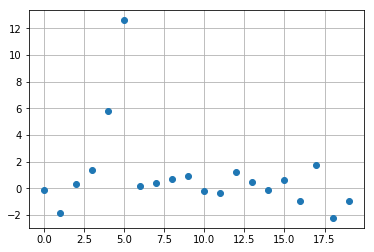

In [16]:
# Наша выборка

x = [-2.21, -1.84, -0.95, -0.91, -0.36, -0.19, -0.11, -0.1, 0.18, 0.30, 0.43, 0.51, 0.64, 0.67, 0.93, 1.22, 1.35, 1.73, 5.8, 12.6]

random.shuffle(x)

plt.plot(x, 'o')
plt.grid()

### Среднее арифметическое (не робастная оценка)
$\overline{X} = \frac{1}{n} \sum_{i=0}^{n} X_i$

In [30]:
mean = np.mean(x)
print(round(mean, 4))

0.9845


### Медиана
$\tilde{X} = median(X) $

In [31]:
median = np.median(x)
print(round(median, 4))

0.365


### Усеченное среднее
$\alpha$ - доля выбросов в выборке, $0<= \alpha <= 0.5$ <br>
$ n $ - размер выборки, <br>
$ r = [\alpha n]$ - наибольшее целое, меньшее или равное $\alpha n$, <br>
$ g = \alpha n - r$ - дробная часть $\alpha n$
Тогда усеченное среднее вычисляется как:
$$ \bar X_T(\alpha) = \frac{1}{n(1-2\alpha)}[(1-g)(X_{(r+1)}+X_{(n-r)})+\sum_{i=r+2}^{n-r-1} X_{(i)}]$$

In [32]:
for alpha in [0.05, 0.1, 0.15, 0.2]:
    print(alpha, '\t|\t',round(stats.trim_mean(x, alpha), 4))

0.05 	|	 0.5167
0.1 	|	 0.3338
0.15 	|	 0.3257
0.2 	|	 0.3433


### Среднеквадратическое отклонение (СКО)
$ \hat \sigma = \sqrt{\frac{1}{n-1}\sum_{i=0}^{n} (X_i - \overline X)^2}$

In [37]:
std = np.std(x)
print(round(std, 4))

3.0968


### MAD - median absolute deviation
$MAD = median(|X_i-\tilde{X}|), \tilde{X} = median(X)$

In [38]:
mad = np.median([abs(x_i - median) for x_i in x])
print(round(mad, 4))

0.645


## Причины появление выбросов: